# Tarea  12

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

Dado que el método implicito de Euler es: $$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$ utilizando el método de Newton con $g(x)=x-f(x,t_1)h$ el método nos dice que: $$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$ además con el punto fijo que cumplen  $x^*$ como $$x^*=f(x^*),$$ asi $$x_{n+1}\to x^*\text{ ,y}$$ tal que $$x_n+f(x,t_{n+1})h\to F(x).$$
Es decir, $x_{n+1}$ (con $x_n$ obviamente conocido) es un punto fijo del sistema dinámico: $$ x_{n+1}^{[k+1]}=x_n+f(x_{n+1}^{[k]},t_{n+1})h,$$ con $x_{n+1}^{[0]}=x_n$.

In [73]:
function derivada_simetrica(f,x0,h)
    D = (f(x0+h)-f(x0-h))./(2*h)    #definamos la derivada simetrica como lo hicimos en una tarea anterior de la formula de rec.
    return D                        
end

derivada_simetrica (generic function with 1 method)

In [74]:
#definamos la función de aproximacion de Newton como g(x)=x-f(x,t_1)h
function newton(g,x0,h)
    dg(z) = derivada_simetrica(g,z,h) #aplicando para la función g, x0 y h
    x = x0;                            
    for i in 1:10                     #iteraciones para la aproximación del M.Newton
        x = x-g(x)/dg(x)               # usando la fórmula de recurrencia del M.Newton 
    end
    return x                          
end

newton (generic function with 1 method)

In [75]:
function fijo(f,x0)
    x = x0         
    for i in 1:20
        x = f(x)   # Iteraciones para aproximar el punto fijo.
    end
    return x      
end

fijo (generic function with 1 method)

In [76]:
#Usando la formula de Euler
function euler_implicito(f,x0,listt,metodo)
    n = length(listt)                    # N° elementos de la lista listt.
    listx = zeros(n)                   
    listx[1] = x0                        # x=x0 , el primer elemento
    h = listt[2]-listt[1]                
    for k in 1:n-1
        xk = listx[k]                    # k-ésimo elemento de listx.
        t = listt[k+1]                   # t representa la (k+1)-ésimo elemento de listt.
        if metodo == "newton"
            g(z) = z - xk - h*f(z,t)     # g es la función a la que deseamos encontrar su raíz x_(k+1).
            listx[k+1] = newton(g,xk,h)  
        elseif metodo == "fijo"
            G(z) = xk + h*f(z,t)
            listx[k+1] = fijo(G,xk)     
        else
            return print("El método debe de ser \x1b[1mnewton\x1b[0m o \x1b[1mfijo\x1b[0m, no está definido para \x1b[1m$metodo\x1b[0m") 
        end
    end
    return listx                         
end

euler_implicito (generic function with 1 method)

Como ejemplos , si tomamos la siguientes funciones: 

In [77]:
listt=0:1:2

0:1:2

In [78]:
f(x)=sinx;
listt=0:2:4
euler_implicito(f,1,listt, "otro")

El método debe de ser newton o fijo, no está definido para otro


__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

Dado que la regla del punto medio es una modificación del método de Euler, cuya fórmula de recurrencia es:
$$x_{k+1}=x_{k}+hf\left(\tilde{x}_{k+\frac{1}{2}},t_{k+\frac{1}{2}}\right),$$
en donde $\displaystyle t_{k+\frac{1}{2}}=t_{k}+\frac{h}{2}$. Y que  $\displaystyle\tilde{x}_{k+\frac{1}{2}}=x_{k}+\frac{h}{2}f(x_{k},t_{k})$ de la 

In [79]:
function pm(f,x0,listt)
     n = length(listt)                               # n° elementos de la lista listt
    listx = zeros(n)                                
    listx[1] = x0                                   # x=x0
    l = (listt[2]-listt[1])/2.0                     # el valor de l es la mitad del paso h
    for k in 1:n-1
        x = listx[k] + l*f(listx[k],listt[k])       # x_{k+1/2}
        listx[k+1] = listx[k] + 2l*f(x,listt[k]+l)  # aprox x_{k+1}
    end
    return listx
end

pm (generic function with 1 method)

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

 El método se escribe como sigue: $$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$ donde: 
 $$k_1=f(t_n,x_n)$$



$$k_2=f(x_n+\frac{h}{2}k_1,t_n+\frac{h}{2})$$

$$k_3=f(x_n+\frac{h}{2}k_2,t_n+\frac{h}{2})$$

$$k_2=f(x_n+hk_3,t_n+h)$$

In [80]:
function RK4(f,x0,listt)
     n = length(listt)                             # n° elementos de la lista listt 
    listx = zeros(n) 
    listx[1] = x0                                      #x=x0 condicion inicial
    l = (listt[2]-listt[1])/2.0                        # l es la mitad del paso h                                 
    for i in 1:n-1
        k1 = f(listx[i],listt[i])                 #definamos los valores de k_i
        k2 = f(listx[i]+l*k1,listt[i]+l)
        k3 = f(listx[i]+l*k2,listt[i]+l)
        k4 = f(listx[i]+2l*k3,listt[i]+2l)
        listx[i+1] = listx[i]+(l/3.0)*(k1+2k2+2k3+k4)  #formula de recurrencia de RK4
    end
    return listx
end

RK4 (generic function with 1 method)

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

El ejercicio de la anterior tarea resolvimos 
$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$
con valores de $h=1.0,0.5,0.2,0.01$. Y su solución es:
$$x(t)=x_{0}e^{-2.5t}.$$
Ahora usando $euler$_$implicito$ para resolver cuando $x(0)=1$.

In [81]:
#definamos la funcion del exponente como
f(x,t)=-2.5x

f (generic function with 2 methods)

In [82]:
using PyPlot

In [83]:
#cambiemos los valores de h cada vez mas chicos para obtener una aprox. de la solucion de la ED.
listt1=0:1:8                             # lista entre el intervalo (0,8) con h=1
listt2=0:0.5:8                            # h="" 0.5.
listt3=0:0.2:8                            # h="" 0.2.
listt4=0:0.01:8                           # h="" 0.01.
listt5=0:0.0001:8                          # h="" 0.0001.
E1=euler_implicito(f,1,listt1,"newton")  # x0=1 para cada S1N.
E2=euler_implicito(f,1,listt2,"newton")
E3=euler_implicito(f,1,listt3,"newton")
E4=euler_implicito(f,1,listt4,"newton")
E5=euler_implicito(f,1,listt5,"newton")

80001-element Array{Float64,1}:
 1.0       
 0.99975   
 0.9995    
 0.99925   
 0.999001  
 0.998751  
 0.998501  
 0.998252  
 0.998002  
 0.997753  
 0.997503  
 0.997254  
 0.997005  
 ⋮         
 2.072e-9  
 2.07148e-9
 2.07097e-9
 2.07045e-9
 2.06993e-9
 2.06941e-9
 2.0689e-9 
 2.06838e-9
 2.06786e-9
 2.06735e-9
 2.06683e-9
 2.06631e-9

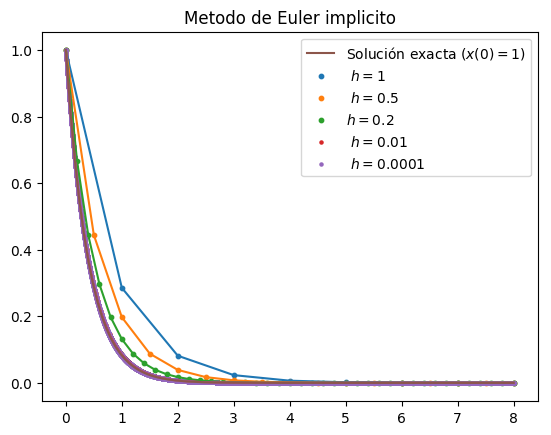

In [84]:
title("Metodo de Euler implicito")
scatter(listt1,E1,label=L" $h=1$",s=10)
plot(listt1,E1)
scatter(listt2,E2,label=L" $h=0.5$",s=10)
plot(listt2,E2)
scatter(listt3,E3,label=L"$h=0.2$",s=10)
plot(listt3,E3)
scatter(listt4,E4,label=L" $h=0.01$",s=5)
plot(listt4,E4)
scatter(listt5,E5,label=L" $h=0.0001$",s=5)
plot(listt5,E5)
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

Comparando con el metodo de Euler ordinario de la tarea anterior, 

In [85]:
function metodo_euler(f,x0,t0,tf,h) #definamos la funcion del metodo de Euler
    t = t0 #condiciones inciales para x y t
    x = x0
    listt = []  #definamos para funciones en x & t  
    listx = []
    push!(listt,t)
    push!(listx,x)
    n = round((tf-t0)/h) #aplicando la formula de Euler
    for i in 1:n-1
        x += h*f(x,t)
        t += h
        push!(listt,t)
        push!(listx,x)
    end
    return listt, listx
end;

In [86]:
ME=metodo_euler(f,1,0,8,1);
ME2=metodo_euler(f,1,0,8,0.5);
ME3=metodo_euler(f,1,0,8,0.2);
ME4=metodo_euler(f,1,0,8,0.01);
ME5=metodo_euler(f,1,0,8,0.0001);

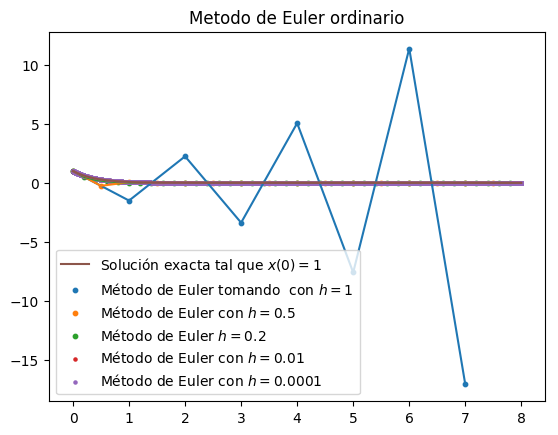

In [87]:
title("Metodo de Euler ordinario")
scatter(ME[1],ME[2],label=L"Método de Euler tomando  con $h=1$",s=10)
plot(ME[1],ME[2])
scatter(ME2[1],ME2[2],label=L"Método de Euler con $h=0.5$ ",s=10) #Grafiquemos la relación entre la solucion general y las MEi
plot(ME2[1],ME2[2])
scatter(ME3[1],ME3[2],label=L"Método de Euler $h=0.2$",s=10)
plot(ME3[1],ME3[2])
scatter(ME4[1],ME4[2],label=L"Método de Euler con $h=0.01$",s=5)
plot(ME4[1],ME4[2])
scatter(ME5[1],ME5[2],label=L"Método de Euler con $h=0.0001$",s=5)
plot(ME5[1],ME5[2])
t = linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta tal que $x(0)=1$")
legend()
show();

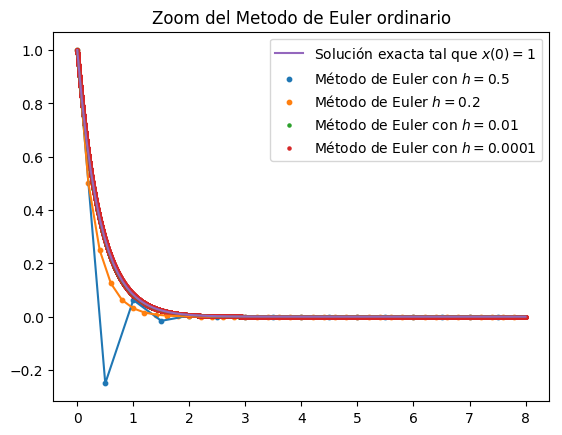

In [88]:
title("Zoom del Metodo de Euler ordinario")
scatter(ME2[1],ME2[2],label=L"Método de Euler con $h=0.5$ ",s=10) #Grafiquemos la relación entre la solucion general y las MEi
plot(ME2[1],ME2[2])
scatter(ME3[1],ME3[2],label=L"Método de Euler $h=0.2$",s=10)
plot(ME3[1],ME3[2])
scatter(ME4[1],ME4[2],label=L"Método de Euler con $h=0.01$",s=5)
plot(ME4[1],ME4[2])
scatter(ME5[1],ME5[2],label=L"Método de Euler con $h=0.0001$",s=5)
plot(ME5[1],ME5[2])
t = linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta tal que $x(0)=1$")
legend()
show();

Como podemos ver para el caso entre h=1 y h=0.5 oscilan con el Metodo de Euler Ordinario(MEO), mientras que para en el Metodo de Euler Implicito (MEI) no sucede esto.
Por otro lado, las demás $h$ ambos métodos convergen a la solucion cuyas aproximaciones son mayores a la solución con la MEI.

__Ejercicio 5:__ Usar el método del punto medio y de Runge-Kutta para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. Nota: Este es el test para el de Runge-Kutta.

In [89]:
#Definamos la funcion de dos variables para resolver la EDP con el metodo punto medio (pm) y comparemos con el RK4
f(x,t)=(2x-18t)/(1+t);
listm1=0:0.5:3;                                 # lista entre el intervalo (0,3) con h=0.5
listm2=0:0.2:3;                #h=0.2
listm3=0:0.01:3;                #h=0.01
listm4=0:0.2:3;                #h=0.0001
PM1=pm(f,4,listm1);
PM2=pm(f,4,listm2);
PM3=pm(f,4,listm3);
PM4=pm(f,4,listm4);

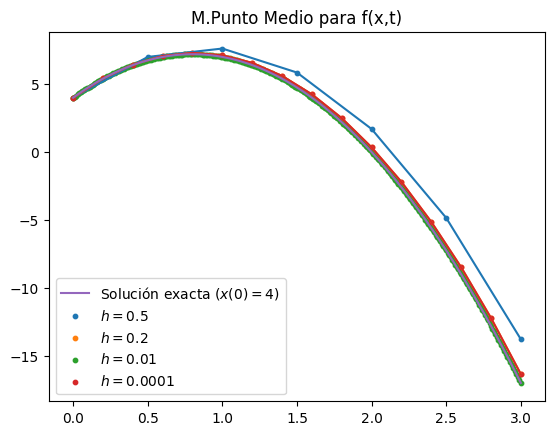

In [90]:
title("M.Punto Medio para f(x,t)")
scatter(listm1,PM1,label=L"$h=0.5$",s=10)
plot(listm1,PM1)
scatter(listm2,PM2,label=L"$h=0.2$",s=10)
plot(listm2,PM2)
scatter(listm3,PM3,label=L"$h=0.01$",s=10)
plot(listm3,PM3)
scatter(listm4,PM4,label=L"$h=0.0001$",s=10)
plot(listm4,PM4)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

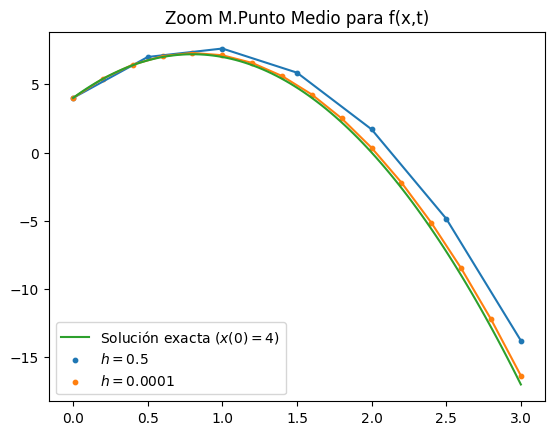

In [91]:
#Veamos que para pasos h tendiendo a 0 ser acercan a la solucion, comparemos:
title("Zoom M.Punto Medio para f(x,t)")
scatter(listm1,PM1,label=L"$h=0.5$",s=10)
plot(listm1,PM1)
scatter(listm4,PM4,label=L"$h=0.0001$",s=10)
plot(listm4,PM4)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

In [92]:
#Hagamos una comparacion con el metodo de RK4
listr1=0:1:3;        
listr2=0:0.5:3;     
listr3=0:0.0001:3;
R1=RK4(f,4,listr1);
R2=RK4(f,4,listr2);
R3=RK4(f,4,listr3);

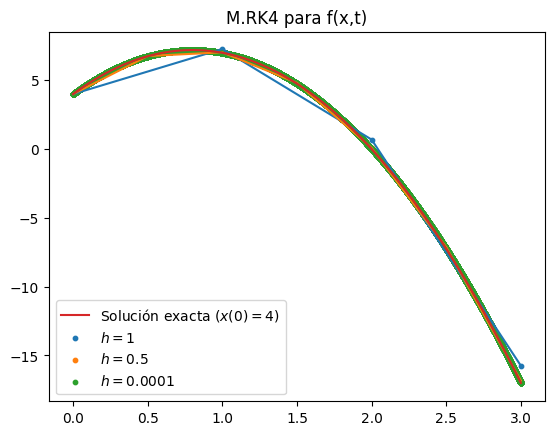

In [93]:
title("M.RK4 para f(x,t)")
scatter(listr1,R1,label=L"$h=1$",s=10)
plot(listr1,R1)
scatter(listr2,R2,label=L"$h=0.5$",s=10)
plot(listr2,R2)
scatter(listr3,R3,label=L"h=0.0001",s=10)
plot(listr3,R3)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();


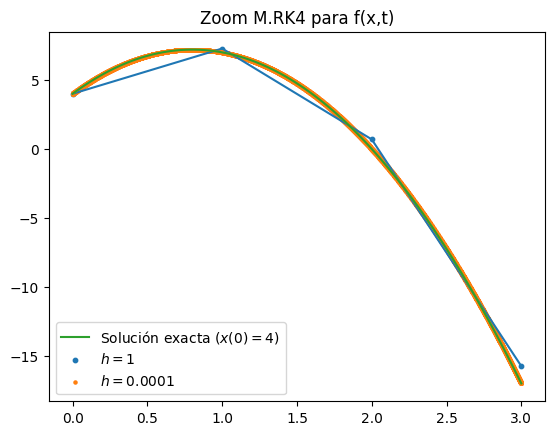

In [94]:
title("Zoom M.RK4 para f(x,t)")
scatter(listr1,R1,label=L"$h=1$",s=10)
plot(listr1,R1)
scatter(listr3,R3,label=L"h=0.0001",s=5)
plot(listr3,R3)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

En conclusion, el metodo del PM es mas aproximado ya que no oscila en los valores de la solucion de la EDP, esto es apreciable cuando h=1, en particular. 

__Ejercicio 6:__ Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.
Nota: Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).
Nota: Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

La ecuación diferencial que modela el oscilador armónico es:
$$\ddot{x}=-kx$$  con $k>0$
Y supongamos que $m=1\:\mathrm{kg}$, $k=4\:\mathrm{N/m}$, $x(0)=3\:\mathrm{m}$ y $\dot{x}(0)=5\:\mathrm{m/s}$, en el intervalo $(0,2\pi)$ como lo vimos en un ejemplo en clase.

Cuya solucion es:
$$x(t)=3cos(2t)+\frac{5}{2}sen(2t)$$
ademas $ x˙(t)=−6sen(2t)+5cos(2t)$
 

In [95]:
#como la funcion x solo depende de una variable, t , entonces modificaremos el codigo para este problema, teniendo solo una dependencia con x
function euler(f,listt,x0)
     x = x0
     h = listt[2]-listt[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [96]:
function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK_4 (generic function with 1 method)

In [97]:
#escribiendo las soluciones x(t) y x'(t) como
X(t)=3*cos(2t)+(5/2)*sin(2t);
V(t)=-6*sin(2t)+5*cos(2t);

Llamamos $u(t)=\dot{x}(t)$, entonces:
$$\left\{\begin{array}{ll}
\dot{x}=u, &; x_{0}=x(0)\\
\dot{u}=-kx, &; u_{0}=\dot{x}(0)
\end{array}\right.$$
Es decir $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:
$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$
con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$. En nuestro caso $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))=$ (x[2],-kx[1]), es decir $\mathbf{x}(t)=$ (x[1],x[2])

In [98]:
f(x,t)=[x[2],-4*x[1]];  # k=4.

In [99]:
listtE=0:0.1:20;        #h=0.1
vecE=euler(f,listtE,[3,5]);

In [100]:
using PyPlot

In [101]:
listxE1=map(x->x[1],vecE)
listxE2=map(x->x[2],vecE)

201-element Array{Real,1}:
    5      
    3.8    
    2.4    
    0.848  
   -0.8    
   -2.48192
   -4.13184
   -5.68248
   -7.06785
   -8.22592
   -9.10128
   -9.6476 
   -9.82987
    ⋮      
  281.298  
  251.671  
  210.792  
  159.847  
  100.47   
   34.6986 
  -35.0913 
 -106.269  
 -176.043  
 -241.567  
 -300.048  
 -348.867  

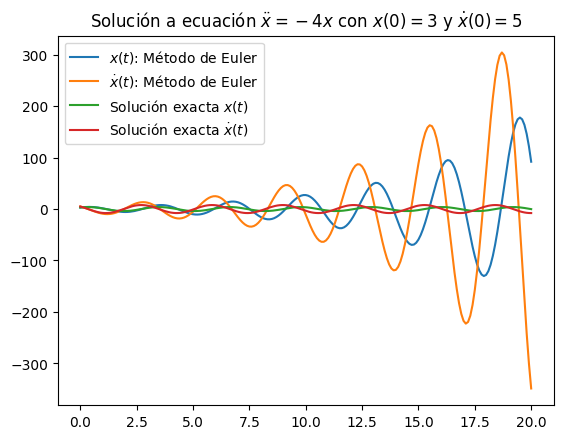

In [102]:
plot(listtE,listxE1,label=L"$x(t)$: Método de Euler")
plot(listtE,listxE2,label=L"$\dot{x}(t)$: Método de Euler");
t=linspace(0,20,200)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

In [103]:
listtRK=0:0.1:20;             # Paso h=0.1
vecRK=RK_4(f,listtRK,[3,5]);


In [104]:
listxRK1=map(x->x[1],vecRK);
listxRK2=map(x->x[2],vecRK);


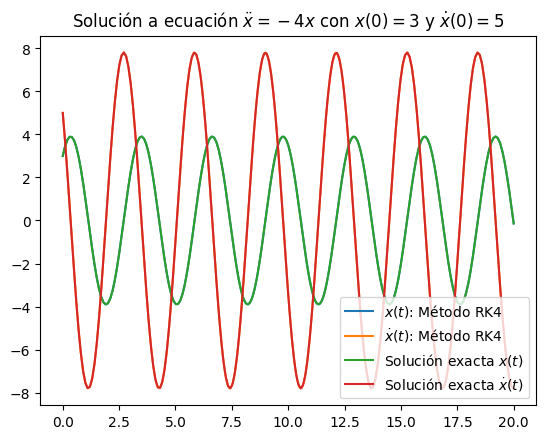

In [105]:
plot(listtRK,listxRK1,label=L"$x(t)$: Método RK4")
plot(listtRK,listxRK2,label=L"$\dot{x}(t)$: Método RK4");
t=linspace(0,20,200)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

Visto en Mecanica Vectorial, la energia del oscilador armónico es:
$$E=\frac{1}{2}m\dot{x}^{2}(t)+\frac{1}{2}kx^{2}(t),$$
entonces usando los valores presentados, $m=1\:\mathrm{kg}$ y $k=4$ $E=\displaystyle\frac{61}{2}\:\mathrm{J}$.
Con el método de Euler:

In [106]:
Energia(t)=61/2;
EnergiaE=0.5*(listxE2.^2+4*listxE1.^2)

201-element Array{Float64,1}:
    30.5   
    31.72  
    32.9888
    34.3084
    35.6807
    37.1079
    38.5922
    40.1359
    41.7414
    43.411 
    45.1475
    46.9533
    48.8315
     ⋮     
 50536.0   
 52557.5   
 54659.8   
 56846.1   
 59120.0   
 61484.8   
 63944.2   
 66501.9   
 69162.0   
 71928.5   
 74805.6   
 77797.9   

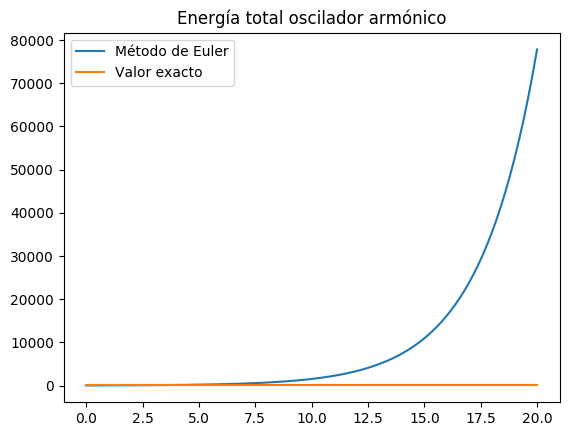

In [107]:
plot(listtE,EnergiaE,label="Método de Euler")
t=linspace(0,20,10)
plot(t,Energia.(t),label="Valor exacto")
title("Energía total oscilador armónico")
legend()
show();

In [108]:
EnergiaRK=0.5*(listxRK2.^2+4*listxRK1.^2);

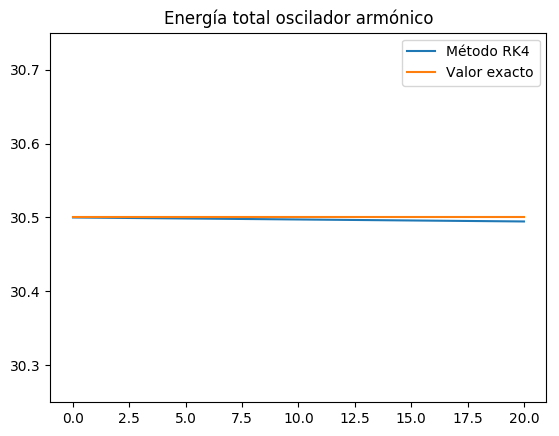

In [109]:
plot(listtRK,EnergiaRK,label="Método RK4")
t=linspace(0,20,10)
plot(t,Energia.(t),label="Valor exacto")
title("Energía total oscilador armónico")
ylim(30.25,30.75)
legend()
show();


Con el metodo de Euler no converge a la solución para $h=0.1$ asi como el RK4 converge mas rapido a la solucion .

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

In [110]:
listtEE=0:0.01:20;             #h=0.01
vecEE=euler(f,listtEE,[3,5])
listxEE1=map(x->x[1],vecEE)
listxEE2=map(x->x[2],vecEE)

2001-element Array{Real,1}:
   5      
   4.88   
   4.758  
   4.63405
   4.50819
   4.38048
   4.25097
   4.11971
   3.98674
   3.85213
   3.71592
   3.57817
   3.43894
   ⋮      
 -11.4159 
 -11.4598 
 -11.4991 
 -11.5339 
 -11.564  
 -11.5896 
 -11.6105 
 -11.6267 
 -11.6384 
 -11.6454 
 -11.6477 
 -11.6453 

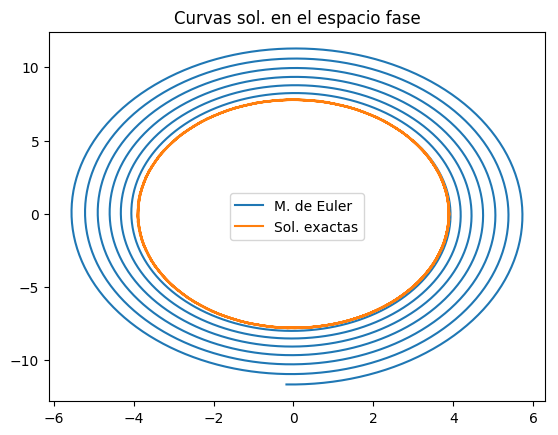

In [111]:
plot(listxEE1,listxEE2,label="M. de Euler");
t = linspace(0,20,200)
plot(X.(t),V.(t),label="Sol. exactas");
title("Curvas sol. en el espacio fase")
legend()
show();

In [112]:
#h=0.01
listtRK4=0:0.01:20;             # Paso h=0.01
vecRK4=RK_4(f,listtRK4,[3,5]);
listxRK41=map(x->x[1],vecRK4);
listxRK42=map(x->x[2],vecRK4);

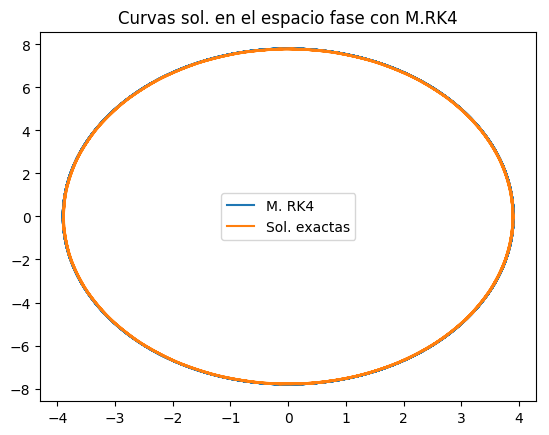

In [113]:
plot(listxRK41,listxRK42,label="M. RK4");
t = linspace(0,20,200)
plot(X.(t),V.(t),label="Sol. exactas");
title("Curvas sol. en el espacio fase con M.RK4")
legend()
show();

Obs. RK4 hace una aporoximacion mayor que el metodo de Euler, por lo que es mas precisa. 

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [114]:
f(x,t)=[x[2],-4*x[1]];  # k=4.

In [115]:
#aplicando diferentes condiciones iniciales acorde a la ED del oscilador armonico, 
listt_RK4=0:0.01:pi;                               # Paso h=0.01
listx_RK121=map(x->x[1],RK_4(f,listt_RK4,[1,2]));  # Solución x(t) para x(0)=1 y v(0)=2
listx_RK122=map(x->x[2],RK_4(f,listt_RK4,[1,2]));  # Solución v(t) para x(0)=1 y v(0)=2
listx_RK111=map(x->x[1],RK_4(f,listt_RK4,[1,1]));  # Solución x(t) para x(0)=1 y v(0)=1
listx_RK112=map(x->x[2],RK_4(f,listt_RK4,[1,1]));  # Solución v(t) para x(0)=1 y v(0)=1
listx_RK281=map(x->x[1],RK_4(f,listt_RK4,[2,8]));  # Solución x(t) para x(0)=2 y v(0)=8
listx_RK282=map(x->x[2],RK_4(f,listt_RK4,[2,8]));  # Solución v(t) para x(0)=2 y v(0)=8
listx_RK931=map(x->x[1],RK_4(f,listt_RK4,[9,3]));  # Solución x(t) para x(0)=9 y v(0)=3
listx_RK932=map(x->x[2],RK_4(f,listt_RK4,[9,3]));  # Solución v(t) para x(0)=9 y v(0)=3
listx_RK571=map(x->x[1],RK_4(f,listt_RK4,[5,7]));  # Solución x(t) para x(0)=5 y v(0)=7
listx_RK572=map(x->x[2],RK_4(f,listt_RK4,[5,7]));  # Solución v(t) para x(0)=5 y v(0)=7
listx_RK381=map(x->x[1],RK_4(f,listt_RK4,[3,8]));  # Solución x(t) para x(0)=3 y v(0)=8
listx_RK382=map(x->x[2],RK_4(f,listt_RK4,[3,8]));  # Solución v(t) para x(0)=3 y v(0)=8

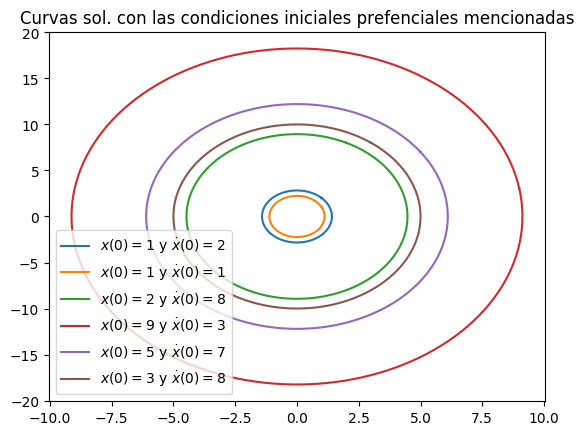

In [116]:
title("Curvas sol. con las condiciones iniciales prefenciales mencionadas")
plot(listx_RK121,listx_RK122,label=L"$x(0)=1$ y $\dot{x}(0)=2$");
plot(listx_RK111,listx_RK112,label=L"$x(0)=1$ y $\dot{x}(0)=1$");
plot(listx_RK281,listx_RK282,label=L"$x(0)=2$ y $\dot{x}(0)=8$");
plot(listx_RK931,listx_RK932,label=L"$x(0)=9$ y $\dot{x}(0)=3$");
plot(listx_RK571,listx_RK572,label=L"$x(0)=5$ y $\dot{x}(0)=7$");
plot(listx_RK381,listx_RK382,label=L"$x(0)=3$ y $\dot{x}(0)=8$");
legend()
show();
